In [1]:
import pandas as pd
import numpy as np, matplotlib.pyplot as plt,seaborn as sns
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns',400)

In [2]:
#data=pd.read_csv('/home/pkumari/Desktop/Linear-Regression/')
import os
dfs = []
for dirname, _, filenames in os.walk('/home/pkumari/Desktop/Linear-Regression/Stock for Lockdown'):
    for filename in filenames:
        dfs.append(pd.read_csv(os.path.join(dirname, filename)))

In [3]:
data_org=pd.concat(dfs,axis=0)

In [4]:
data_org.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,SUNPHARMA,EQ,02-Mar-2020,372.90,378.00,383.65,363.35,372.05,369.50,376.87,6915567,2.606303e+09,72067,2742894,39.66
1,SUNPHARMA,EQ,03-Mar-2020,369.50,374.00,396.40,373.25,396.00,393.55,386.86,14474553,5.599645e+09,167409,5469999,37.79
2,SUNPHARMA,EQ,04-Mar-2020,393.55,398.00,412.90,387.35,404.50,405.45,403.52,26369149,1.064059e+10,271057,3273035,12.41
3,SUNPHARMA,EQ,05-Mar-2020,405.45,409.95,414.80,401.75,404.50,404.90,408.26,9874059,4.031204e+09,106590,1526528,15.46
4,SUNPHARMA,EQ,06-Mar-2020,404.90,390.05,403.20,390.05,400.10,400.90,398.45,6500912,2.590278e+09,81949,1532372,23.57


In [5]:
data_org.shape

(10450, 15)

In [6]:
data_org['Profit']=data_org['Close Price']-data_org['Prev Close']


In [7]:
data_org.drop(['% Dly Qt to Traded Qty','Deliverable Qty'],axis=1,inplace=True)
data_org.drop(['High Price','Low Price'],axis=1,inplace=True)

In [8]:
col=data_org.columns.to_list()

In [9]:
col

['Symbol',
 'Series',
 'Date',
 'Prev Close',
 'Open Price',
 'Last Price',
 'Close Price',
 'Average Price',
 'Total Traded Quantity',
 'Turnover',
 'No. of Trades',
 'Profit']

In [10]:
del col[0]
del col[0]
del col[0]

In [11]:
data_log=data_org.copy()

In [12]:
data_log['Total Traded Quantity']=np.log(data_log['Total Traded Quantity'])
data_log['Turnover']=np.log(data_log['Turnover'])
data_log['No. of Trades']=np.log(data_log['No. of Trades'])
data_log['Profit']=data_log['Profit']*100

In [13]:
# for i in col:
#     dfs_all[i]=np.log(dfs_all[i])

In [14]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [15]:
hopkins(data_log.drop(['Symbol','Series','Date'],axis=1))

0.9997652335456022

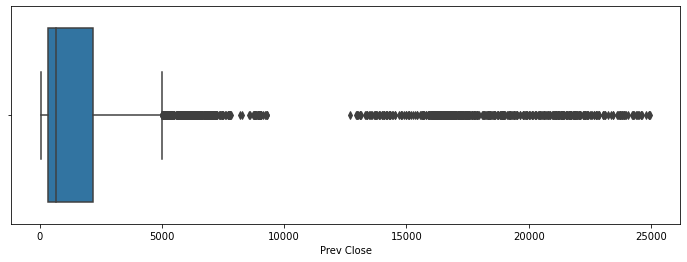

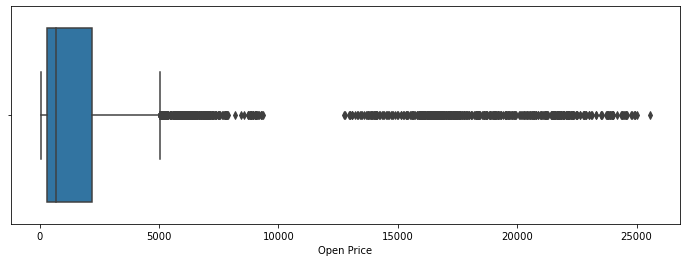

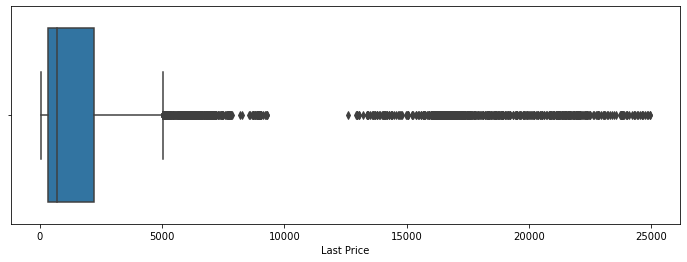

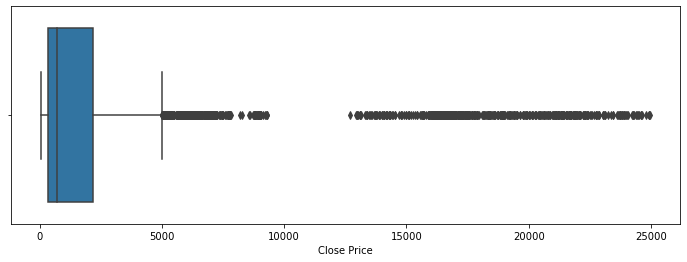

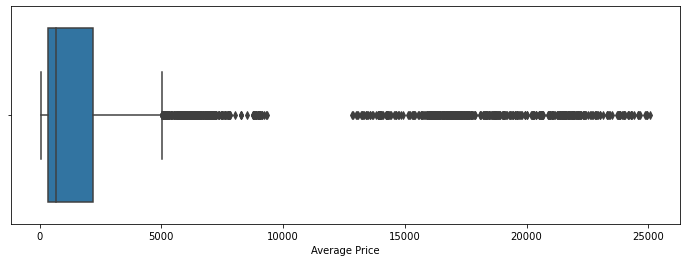

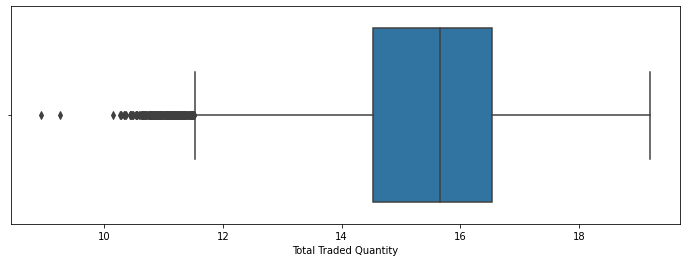

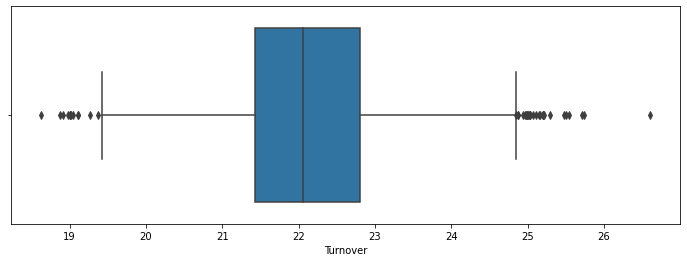

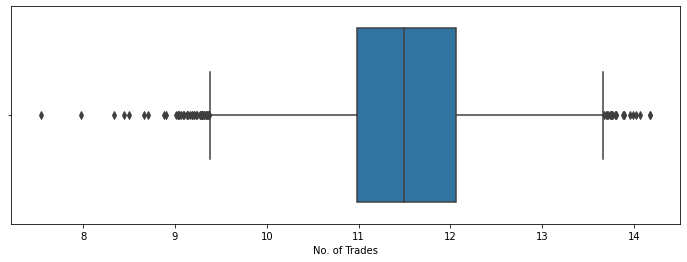

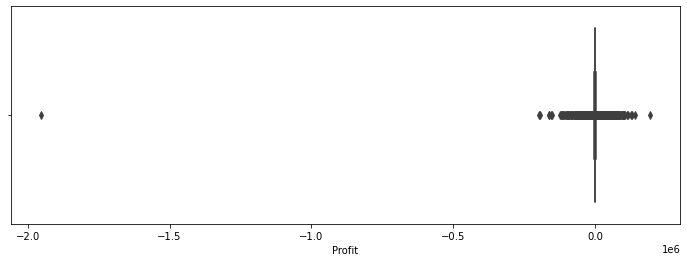

In [16]:
for i in col:
    plt.figure(figsize=(12,4))
    sns.boxplot(data_log[i])

In [18]:
data_log.head()

,Symbol,Series,Date,Prev Close,Open Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Profit
0,SUNPHARMA,EQ,02-Mar-2020,372.90,378.00,372.05,369.50,376.87,15.749286,21.681199,11.185352,-340.0
1,SUNPHARMA,EQ,03-Mar-2020,369.50,374.00,396.00,393.55,386.86,16.487903,22.445969,12.028195,2405.0
2,SUNPHARMA,EQ,04-Mar-2020,393.55,398.00,404.50,405.45,403.52,17.087705,23.087942,12.510084,1190.0
3,SUNPHARMA,EQ,05-Mar-2020,405.45,409.95,404.50,404.90,408.26,16.105422,22.117331,11.576745,-55.0
4,SUNPHARMA,EQ,06-Mar-2020,404.90,390.05,400.10,400.90,398.45,15.687453,21.675031,11.313852,-400.0


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data_log.drop(['Symbol','Series','Date'],axis=1))

In [20]:
data_scaled

array([[-0.44333567, -0.44238467, -0.44390795, ..., -0.48742234,
        -0.43566419, -0.01783539],
       [-0.4441574 , -0.44335089, -0.43811572, ...,  0.32843367,
         0.63897075,  0.10453802],
       [-0.43834491, -0.43755356, -0.43606003, ...,  1.01328992,
         1.25338478,  0.05037274],
       ...,
       [ 0.29181652,  0.29556756,  0.29673516, ..., -0.59940911,
        -1.14368567,  0.07244007],
       [ 0.29588888,  0.2965821 ,  0.29929873, ..., -0.66641366,
        -1.21503911,  0.07132556],
       [ 0.29990082,  0.30328526,  0.29685608, ..., -1.13816282,
        -1.51836892, -0.02095602]])

In [22]:
data_scaled=pd.DataFrame(data_scaled)
data_scaled.columns=col

## K-MEANS ALGORITHM

In [24]:
from sklearn.cluster import KMeans

In [25]:
#Findingthe Optimal Number of CLuster

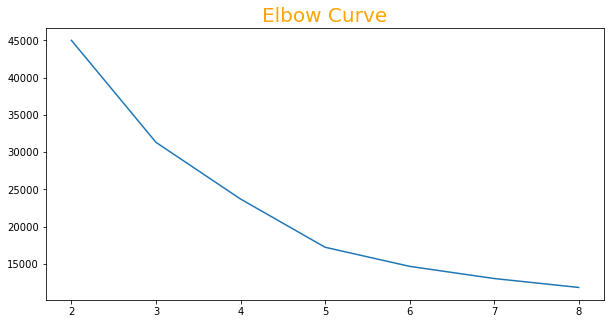

In [26]:
#Elbow curve /SSD(sm of squared distances)
plt.figure(figsize=[10,5])
ssd=[]
range_n_cluster=[2,3,4,5,6,7,8]
for num_cluster in range_n_cluster:
    kmeans=KMeans(n_clusters=num_cluster,max_iter=100)
    kmeans.fit(data_scaled)
    
    ssd.append([num_cluster,kmeans.inertia_])
temp=pd.DataFrame(ssd)    
plt.plot(temp[0],temp[1])
plt.title('Elbow Curve',color='Orange',fontsize=20)
plt.show()

In [27]:
ssd

[[2, 44994.858972490634],
 [3, 31308.633433680727],
 [4, 23702.207730693444],
 [5, 17230.229320874827],
 [6, 14666.724939886473],
 [7, 13033.473279847934],
 [8, 11836.372999824898]]

In [28]:
#Silhouette Analysis

- when do we call two cluster as Good, if the data point is as far away from other dta awhich is in other cluster
- knows as inter cluster should high, similarly, intra cluster shoud be very low
- p- mean dts to the points in the nearest cluster that data point is not part of
- q- mean intra cluster distance to all points in its own cluster
- value of silhouette score is -1,1
- silhouette score near to 1 defines that data point is very similar to the other data point 

In [29]:
from sklearn.metrics import silhouette_score
range_n_cluster=[2,3,4,5,6,7,8]
for num_cluster in range_n_cluster:
    kmeans=KMeans(n_clusters=num_cluster,max_iter=100)
    kmeans.fit(data_scaled)
    
    cluster_labels=kmeans.labels_
    #silhouette score
    silhouette_avg=silhouette_score(data_scaled,cluster_labels)
    print("for n cluster {0} silhouette_score is {1}".format(num_cluster,silhouette_avg))

for n cluster 2 silhouette_score is 0.7630152375766626
for n cluster 3 silhouette_score is 0.38416893634282734
for n cluster 4 silhouette_score is 0.38327140151515754
for n cluster 5 silhouette_score is 0.4067761726115202
for n cluster 6 silhouette_score is 0.34577141434139064
for n cluster 7 silhouette_score is 0.3541860941941558
for n cluster 8 silhouette_score is 0.3389148331342763


In [30]:
# we will have go-ahead with 3 Clusters 
#final model with k=3
kmeans=KMeans(n_clusters=3,max_iter=100)
kmeans.fit(data_scaled)

KMeans(max_iter=100, n_clusters=3)

In [31]:
data_model_cluster_id=data_org.copy()

In [32]:
data_model_cluster_id['cluster_id']=kmeans.labels_
data_model_cluster_id.head()

,Symbol,Series,Date,Prev Close,Open Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Profit,cluster_id
0,SUNPHARMA,EQ,02-Mar-2020,372.90,378.00,372.05,369.50,376.87,6915567,2.606303e+09,72067,-3.40,1
1,SUNPHARMA,EQ,03-Mar-2020,369.50,374.00,396.00,393.55,386.86,14474553,5.599645e+09,167409,24.05,2
2,SUNPHARMA,EQ,04-Mar-2020,393.55,398.00,404.50,405.45,403.52,26369149,1.064059e+10,271057,11.90,2
3,SUNPHARMA,EQ,05-Mar-2020,405.45,409.95,404.50,404.90,408.26,9874059,4.031204e+09,106590,-0.55,1
4,SUNPHARMA,EQ,06-Mar-2020,404.90,390.05,400.10,400.90,398.45,6500912,2.590278e+09,81949,-4.00,1


In [33]:
data_model_cluster_id['cluster_id'].value_counts()

1    5885
2    4029
0     536
Name: cluster_id, dtype: int64

In [34]:
col=data_scaled.columns.to_list()

In [35]:
data_log['cluster_id']=kmeans.labels_
data_log.head()

,Symbol,Series,Date,Prev Close,Open Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Profit,cluster_id
0,SUNPHARMA,EQ,02-Mar-2020,372.90,378.00,372.05,369.50,376.87,15.749286,21.681199,11.185352,-340.0,1
1,SUNPHARMA,EQ,03-Mar-2020,369.50,374.00,396.00,393.55,386.86,16.487903,22.445969,12.028195,2405.0,2
2,SUNPHARMA,EQ,04-Mar-2020,393.55,398.00,404.50,405.45,403.52,17.087705,23.087942,12.510084,1190.0,2
3,SUNPHARMA,EQ,05-Mar-2020,405.45,409.95,404.50,404.90,408.26,16.105422,22.117331,11.576745,-55.0,1
4,SUNPHARMA,EQ,06-Mar-2020,404.90,390.05,400.10,400.90,398.45,15.687453,21.675031,11.313852,-400.0,1


In [36]:
data_scaled_kmeans=data_scaled.copy()

In [37]:
data_scaled_kmeans['cluster_id']=kmeans.labels_

<Figure size 864x288 with 0 Axes>

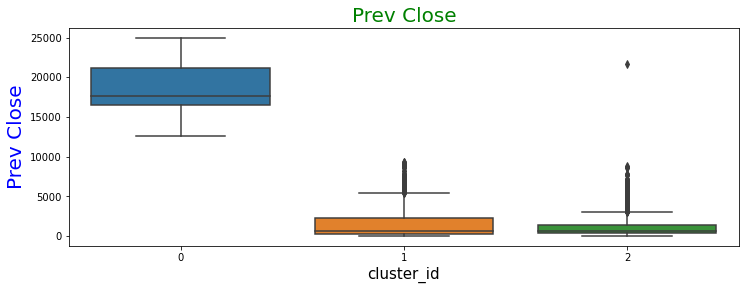

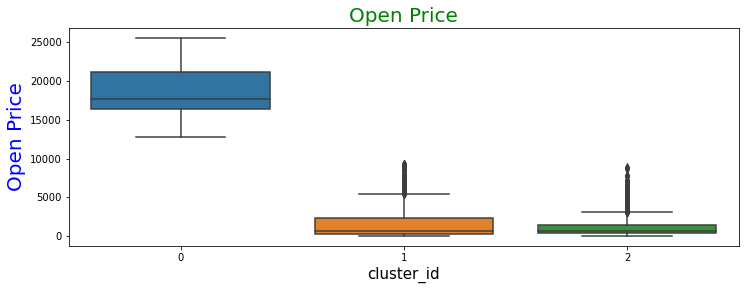

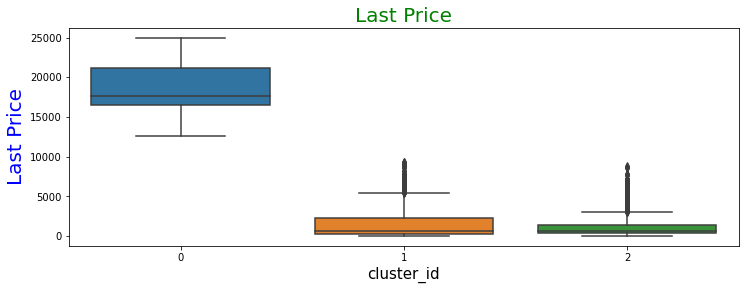

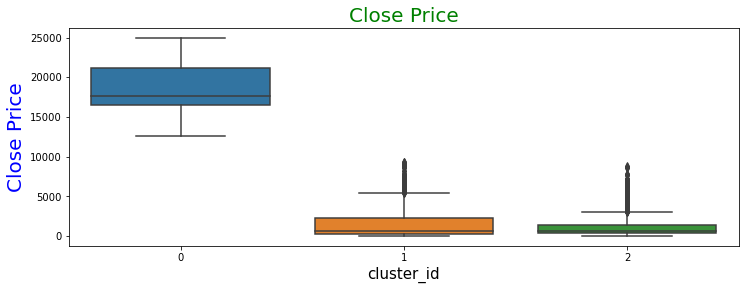

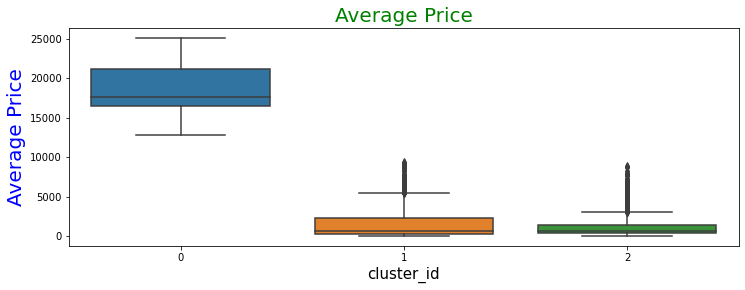

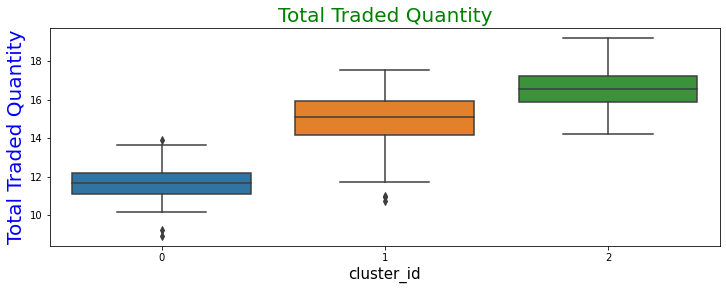

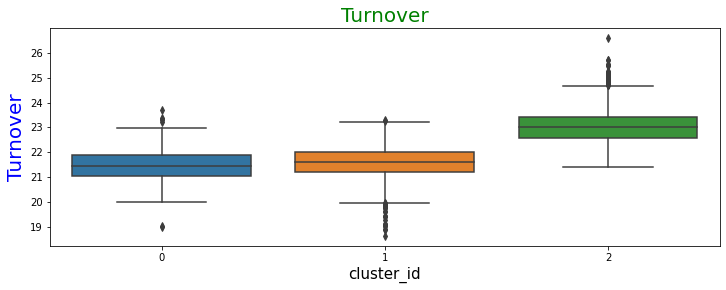

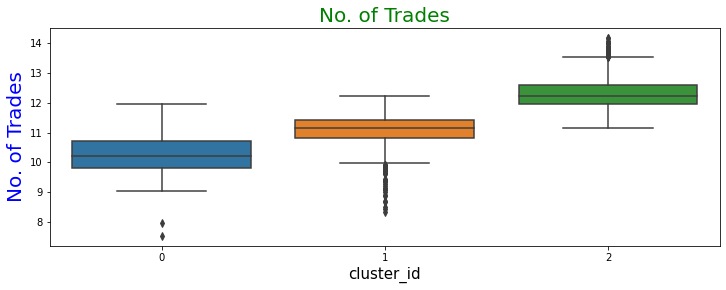

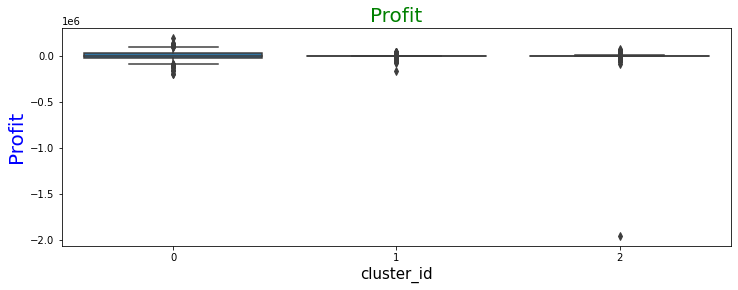

In [38]:
#plot
plt.figure(figsize=(12,4))
for i in col:
    plt.figure(figsize=(12,4))
    sns.boxplot(data=data_log,x='cluster_id',y=i)
    plt.xlabel('cluster_id',color='Black',fontsize=15)
    plt.ylabel(i,color='Blue',fontsize=20)
    plt.title(i,color='Green',fontsize=20)

<Figure size 864x288 with 0 Axes>

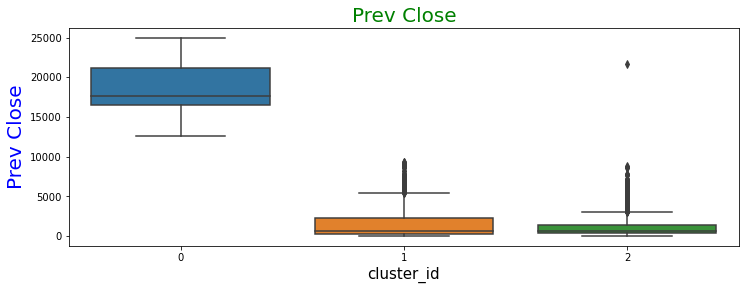

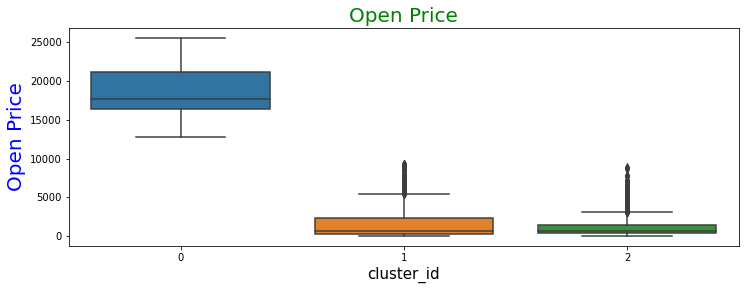

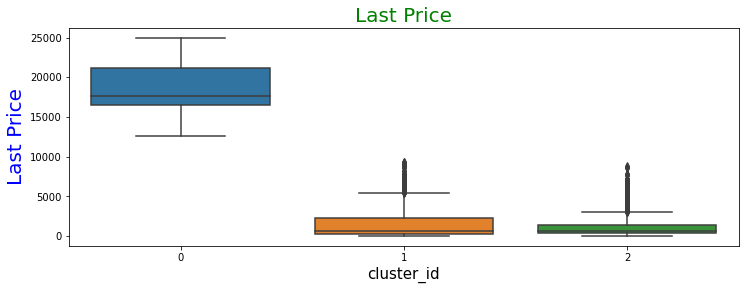

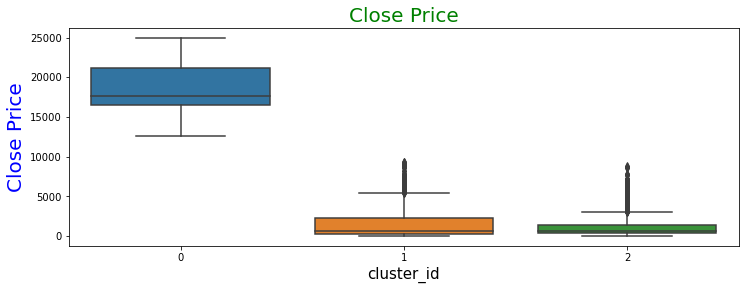

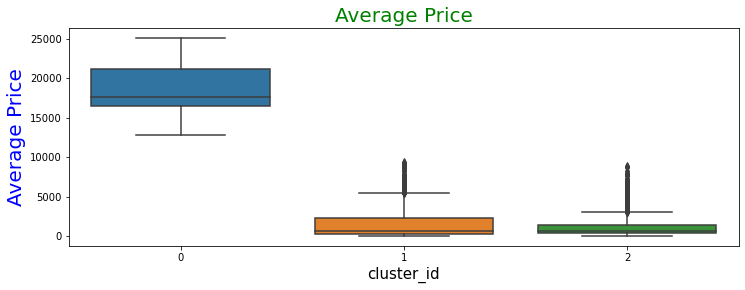

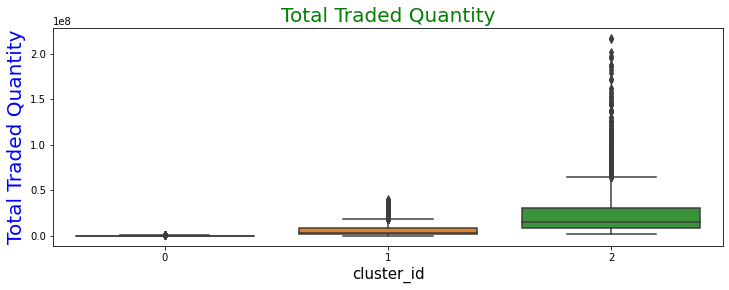

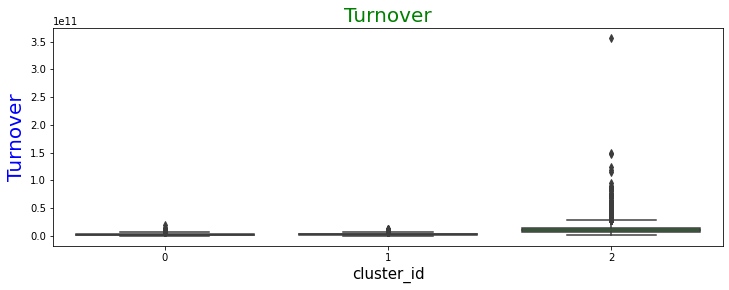

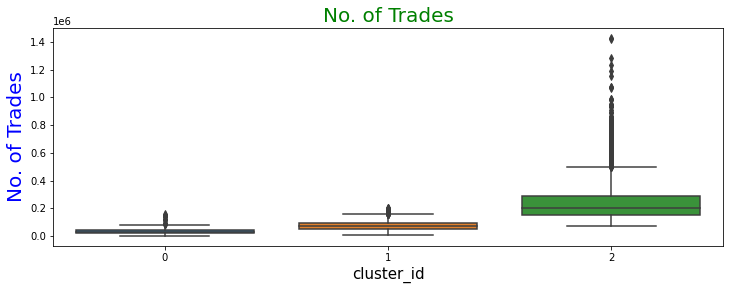

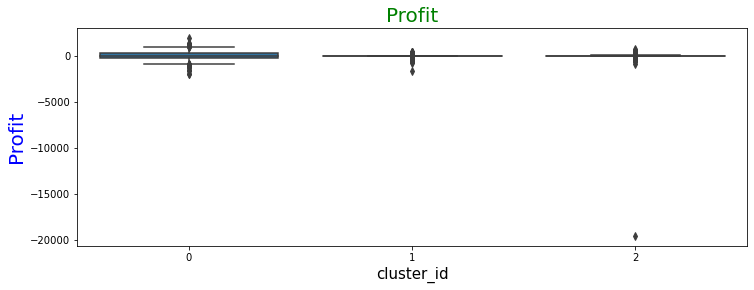

In [39]:
#plot
plt.figure(figsize=(12,4))
for i in col:
    plt.figure(figsize=(12,4))
    sns.boxplot(data=data_model_cluster_id,x='cluster_id',y=i)
    plt.xlabel('cluster_id',color='Black',fontsize=15)
    plt.ylabel(i,color='Blue',fontsize=20)
    plt.title(i,color='Green',fontsize=20)

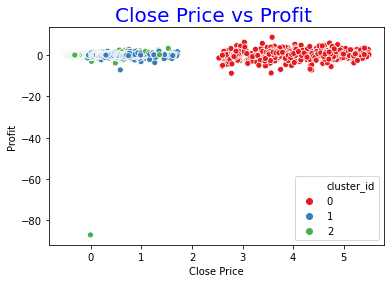

In [40]:
#child_mort vs gdpp
sns.scatterplot(data=data_scaled_kmeans,x='Close Price',y='Profit',hue='cluster_id',palette='Set1')
plt.title('Close Price vs Profit ',color='b',fontsize=20)
plt.show()

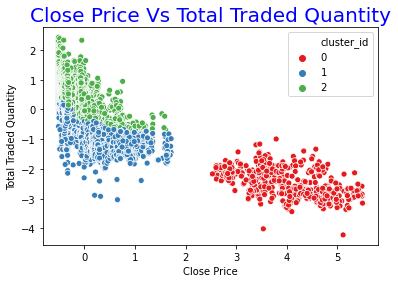

In [41]:
sns.scatterplot(data=data_scaled_kmeans,x='Close Price',y='Total Traded Quantity',hue='cluster_id',palette='Set1')
plt.title('Close Price Vs Total Traded Quantity',color='b',fontsize=20)
plt.show()

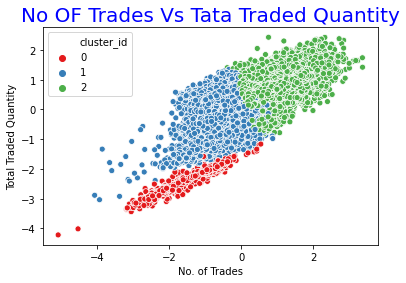

In [42]:
sns.scatterplot(data=data_scaled_kmeans,x='No. of Trades',y='Total Traded Quantity',hue='cluster_id',palette='Set1')
plt.title('No OF Trades Vs Tata Traded Quantity',color='b',fontsize=20)
plt.show()

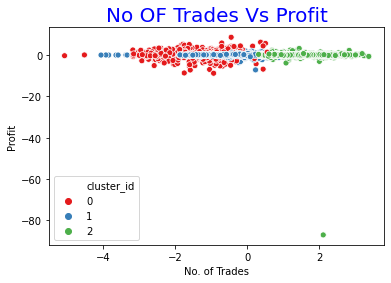

In [43]:
sns.scatterplot(data=data_scaled_kmeans,x='No. of Trades',y='Profit',hue='cluster_id',palette='Set1')
plt.title('No OF Trades Vs Profit',color='b',fontsize=20)
plt.show()

In [45]:
data_model_cluster_id['Profit']=data_model_cluster_id['Profit']*100

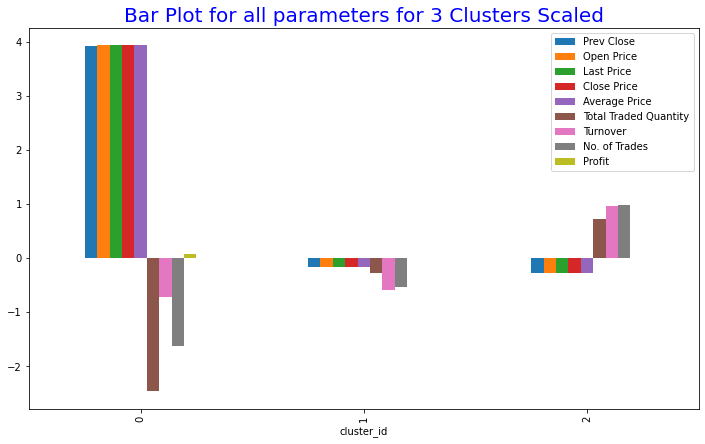

In [46]:
df1=data_scaled_kmeans.groupby('cluster_id').mean().plot(kind='bar',figsize=[12,7])
plt.title('Bar Plot for all parameters for 3 Clusters Scaled',color='b',fontsize=20)
plt.show()

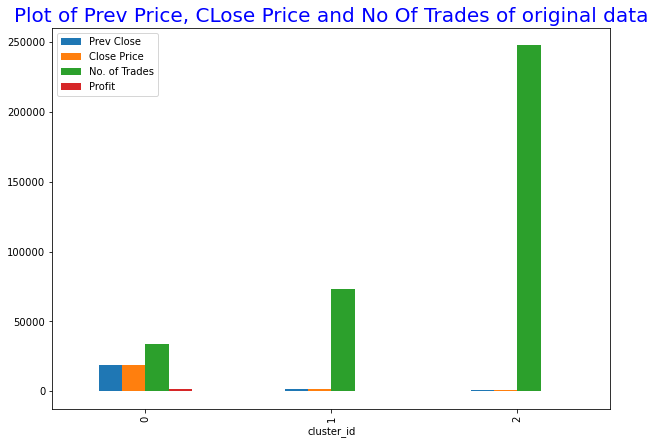

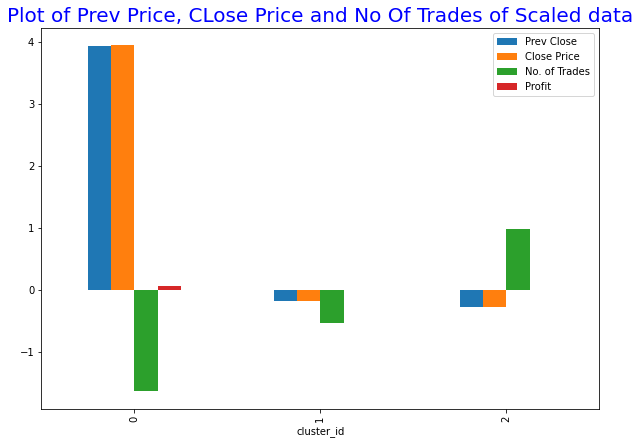

In [47]:
#Graph of GDPP , INCOME and CHILD MORTALITY in each CLUSTERS
data_model_cluster_id.drop(['Symbol','Series','Date','Open Price','Last Price','Average Price','Turnover','Total Traded Quantity'],axis=1).groupby('cluster_id').mean().plot(kind='bar',figsize=[10,7])
plt.title('Plot of Prev Price, CLose Price and No Of Trades of original data',color='b',fontsize=20)
plt.show()
data_scaled_kmeans.drop(['Open Price','Last Price','Average Price','Turnover','Total Traded Quantity'],axis=1).groupby('cluster_id').mean().plot(kind='bar',figsize=[10,7])
plt.title('Plot of Prev Price, CLose Price and No Of Trades of Scaled data',color='b',fontsize=20)
plt.show()

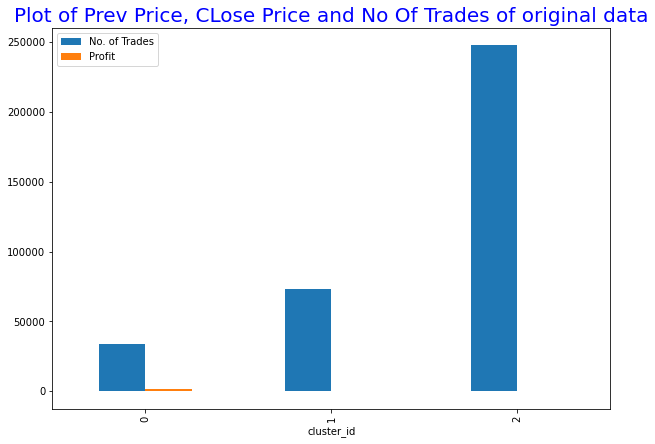

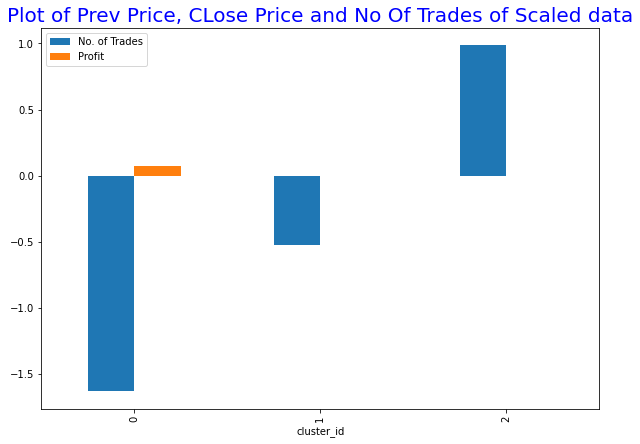

In [48]:
#Graph of GDPP , INCOME and CHILD MORTALITY in each CLUSTERS
data_model_cluster_id.drop(['Symbol','Series','Date','Prev Close','Close Price','Open Price','Last Price',
                 'Average Price','Turnover','Total Traded Quantity'],axis=1).groupby('cluster_id').mean().plot(kind='bar',figsize=[10,7])
plt.title('Plot of Prev Price, CLose Price and No Of Trades of original data',color='b',fontsize=20)
plt.show()
data_scaled_kmeans.drop(['Open Price','Last Price','Prev Close','Close Price','Average Price','Turnover','Total Traded Quantity'],axis=1).groupby('cluster_id').mean().plot(kind='bar',figsize=[10,7])
plt.title('Plot of Prev Price, CLose Price and No Of Trades of Scaled data',color='b',fontsize=20)
plt.show()

In [49]:
data_model_cluster_id[data_model_cluster_id['cluster_id']==2].sort_values(by=['Prev Close','Close Price','No. of Trades'],ascending=[True,True,False]).head(10)

,Symbol,Series,Date,Prev Close,Open Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Profit,cluster_id
11,ONGC,EQ,18-Mar-2020,60.00,61.60,62.00,68.15,66.77,178593486,1.192487e+10,257249,815.0,2
10,ONGC,EQ,17-Mar-2020,60.15,61.10,60.20,60.00,61.25,46722526,2.861821e+09,172593,-15.0,2
15,ONGC,EQ,24-Mar-2020,60.40,63.50,62.70,62.50,62.22,38810910,2.414635e+09,132598,210.0,2
13,ONGC,EQ,20-Mar-2020,61.05,63.05,71.90,72.35,69.11,128784781,8.900611e+09,357927,1130.0,2
17,ONGC,EQ,26-Mar-2020,61.55,61.85,65.00,64.75,62.92,46474998,2.924216e+09,146986,320.0,2
8,ONGC,EQ,13-Mar-2020,62.50,59.40,66.85,65.90,61.00,73052306,4.456292e+09,253152,340.0,2
20,ONGC,EQ,31-Mar-2020,63.35,65.00,68.00,68.30,67.39,45892788,3.092928e+09,162901,495.0,2
23,TATAMOTORS,EQ,07-Apr-2020,65.30,68.55,67.20,67.25,67.81,42070735,2.852690e+09,149087,195.0,2
33,ONGC,EQ,23-Apr-2020,65.35,67.50,67.25,67.35,67.67,38208748,2.585411e+09,143993,200.0,2
22,ONGC,EQ,03-Apr-2020,65.75,69.00,69.80,69.85,68.84,39761221,2.737029e+09,154154,410.0,2


In [50]:
data_model_cluster_id[data_model_cluster_id['cluster_id']==2].sort_values(by=['No. of Trades','Prev Close','Close Price'],ascending=[False,True,True]).head(10)

,Symbol,Series,Date,Prev Close,Open Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Profit,cluster_id
167,RELIANCE,EQ,02-Nov-2020,2054.50,2027.00,1876.00,1877.45,1927.55,45857806,8.839332e+10,1428490,-17705.0,2
11,INDUSINDBK,EQ,18-Mar-2020,604.15,629.00,459.20,460.80,490.24,74868388,3.670341e+10,1424793,-14335.0,2
90,RELIANCE,EQ,15-Jul-2020,1917.00,1937.95,1842.35,1844.00,1917.63,64458598,1.236080e+11,1285533,-7300.0,2
131,RELIANCE,EQ,10-Sep-2020,2161.35,2183.10,2319.00,2314.00,2275.51,64751766,1.473434e+11,1233053,15265.0,2
32,RELIANCE,EQ,22-Apr-2020,1237.35,1320.00,1359.00,1363.60,1341.48,65230894,8.750594e+10,1194059,12625.0,2
34,RELIANCE,EQ,24-Apr-2020,1370.90,1350.15,1425.80,1417.00,1431.67,61711388,8.835030e+10,1154959,4610.0,2
97,RELIANCE,EQ,24-Jul-2020,2057.80,2058.00,2148.40,2146.15,2128.53,55656793,1.184669e+11,1078097,8835.0,2
18,INDUSINDBK,EQ,27-Mar-2020,435.90,479.45,411.15,411.10,445.05,43891665,1.953419e+10,1073663,-2480.0,2
24,INDUSINDBK,EQ,08-Apr-2020,383.85,382.00,398.90,399.15,396.43,56093740,2.223731e+10,1066264,1530.0,2
168,RELIANCE,EQ,03-Nov-2020,1877.45,1890.00,1854.50,1850.40,1873.92,40931170,7.670176e+10,990935,-2705.0,2


In [51]:
data_model_cluster_id[data_model_cluster_id['cluster_id']==2].sort_values(by=['No. of Trades','Prev Close','Close Price'],ascending=[True,True,True]).head(10)

,Symbol,Series,Date,Prev Close,Open Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Profit,cluster_id
57,POWERGRID,EQ,29-May-2020,157.25,157.25,157.35,157.55,157.42,35912738,5.653458e+09,70084,30.0,2
137,NTPC,EQ,18-Sep-2020,88.65,89.05,90.90,90.55,90.04,44757936,4.029903e+09,74881,190.0,2
170,ADANIPORTS,EQ,05-Nov-2020,361.10,366.05,368.50,368.65,367.43,16920686,6.217199e+09,81951,755.0,2
172,NTPC,EQ,09-Nov-2020,87.30,88.65,89.65,89.45,88.75,42703600,3.789987e+09,85243,215.0,2
165,NTPC,EQ,29-Oct-2020,88.10,87.00,86.60,86.50,87.09,41915668,3.650637e+09,86154,-160.0,2
76,POWERGRID,EQ,25-Jun-2020,178.50,178.40,178.25,179.35,179.60,23012314,4.132964e+09,89366,85.0,2
178,NTPC,EQ,17-Nov-2020,90.90,91.75,88.60,88.70,89.70,55324429,4.962629e+09,89503,-220.0,2
161,NTPC,EQ,23-Oct-2020,84.65,86.00,86.15,86.25,85.64,46259632,3.961748e+09,90776,160.0,2
189,IOC,EQ,03-Dec-2020,88.40,89.45,89.90,89.90,88.96,39317570,3.497752e+09,90809,150.0,2
170,NTPC,EQ,05-Nov-2020,85.10,85.85,86.85,86.80,86.38,41267817,3.564905e+09,91671,170.0,2


## HIERARCHICAL ALGORITHM

In [52]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

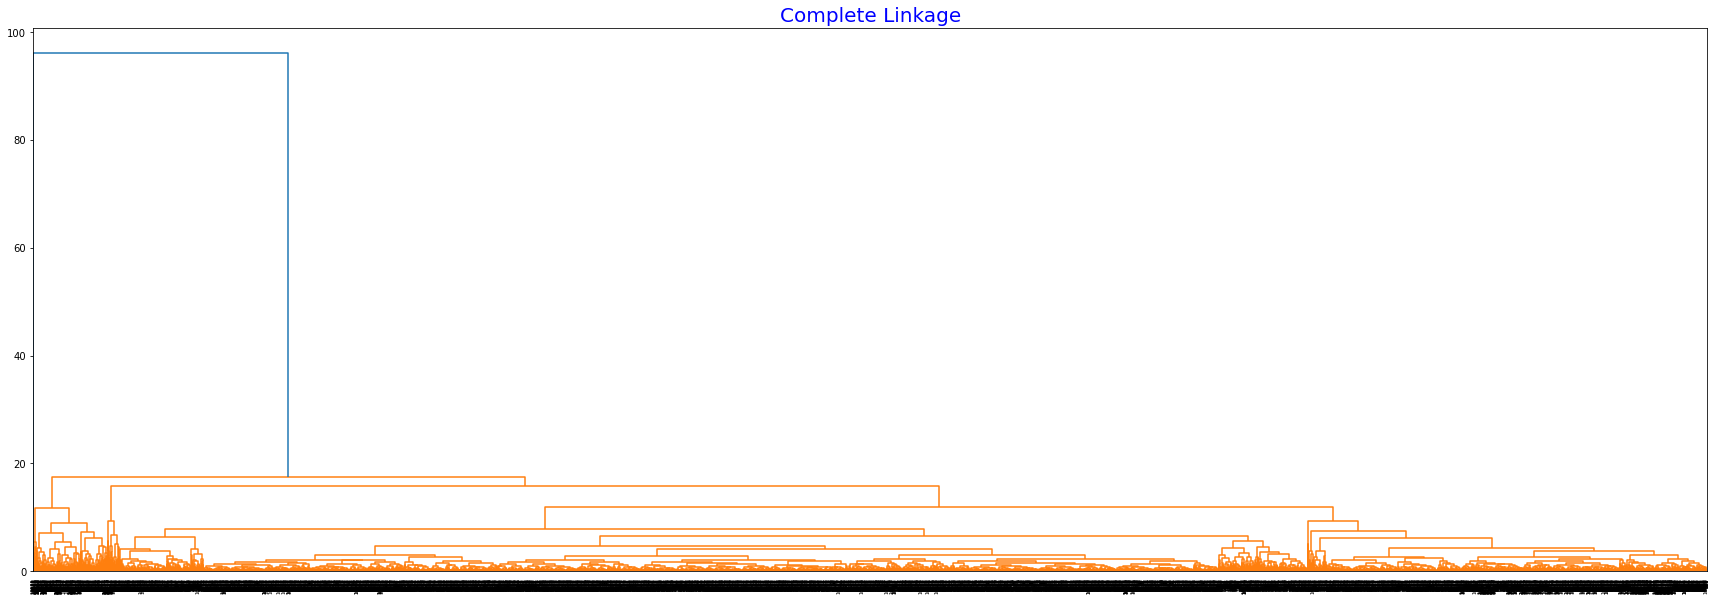

In [55]:
#complete linkage
plt.figure(figsize=[30,10])
mergings = linkage(data_scaled,method='complete',metric='euclidean')
dendrogram(mergings)
plt.title('Complete Linkage',fontsize=20,color='b')
plt.show()

In [67]:
#3 cluster
#cut_tree_tree_treeth cluster number as 3 , we use cut tree to dra a line which make 3 cluster for denrogram and reshaping it into numpy array 
cluster_label=cut_tree(mergings,n_clusters=3).reshape(-1,)

In [68]:
df_hie=data_scaled.copy()
#cluster_label=pd.DataFrame(cluster_label)
df_hie['cluster_id']=cluster_label
df_hie
#With original Data

,Prev Close,Open Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Profit,cluster_id
0,-0.443336,-0.442385,-0.443908,-0.444362,-0.442777,0.195599,-0.487422,-0.435664,-0.017835,0
1,-0.444157,-0.443351,-0.438116,-0.438549,-0.440363,0.674322,0.328434,0.638971,0.104538,0
2,-0.438345,-0.437554,-0.436060,-0.435673,-0.436336,1.063073,1.013290,1.253385,0.050373,0
3,-0.435469,-0.434667,-0.436060,-0.435806,-0.435191,0.426423,-0.022157,0.063367,-0.005130,0
4,-0.435602,-0.439474,-0.437124,-0.436772,-0.437562,0.155524,-0.494002,-0.271824,-0.020510,0
...,...,...,...,...,...,...,...,...,...,...
10445,0.266428,0.267789,0.279975,0.282054,0.284676,-0.766364,0.271601,-0.336823,0.287541,0
10446,0.282161,0.284698,0.293228,0.291711,0.289387,-1.460781,-0.865258,-1.432488,0.175421,0
10447,0.291817,0.295568,0.296735,0.295783,0.296986,-1.305219,-0.599409,-1.143686,0.072440,0
10448,0.295889,0.296582,0.299299,0.299796,0.299427,-1.347828,-0.666414,-1.215039,0.071326,0


In [69]:
df_hie.head()

,Prev Close,Open Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Profit,cluster_id
0,-0.443336,-0.442385,-0.443908,-0.444362,-0.442777,0.195599,-0.487422,-0.435664,-0.017835,0
1,-0.444157,-0.443351,-0.438116,-0.438549,-0.440363,0.674322,0.328434,0.638971,0.104538,0
2,-0.438345,-0.437554,-0.436060,-0.435673,-0.436336,1.063073,1.013290,1.253385,0.050373,0
3,-0.435469,-0.434667,-0.436060,-0.435806,-0.435191,0.426423,-0.022157,0.063367,-0.005130,0
4,-0.435602,-0.439474,-0.437124,-0.436772,-0.437562,0.155524,-0.494002,-0.271824,-0.020510,0


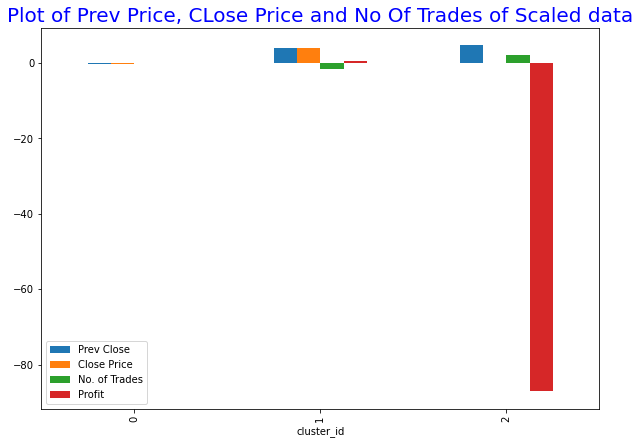

In [70]:
#Graph of GDPP , INCOME and CHILD MORTALITY in each CLUSTERS
# df_hie.drop(['Symbol','Series','Date','Open Price','Last Price','Average Price','Turnover','Total Traded Quantity'],axis=1).groupby('cluster_id').mean().plot(kind='bar',figsize=[10,7])
# plt.title('Plot of Prev Price, CLose Price and No Of Trades of original data',color='b',fontsize=20)
# plt.show()
df_hie.drop(['Open Price','Last Price','Average Price','Turnover','Total Traded Quantity'],axis=1).groupby('cluster_id').mean().plot(kind='bar',figsize=[10,7])
plt.title('Plot of Prev Price, CLose Price and No Of Trades of Scaled data',color='b',fontsize=20)
plt.show()

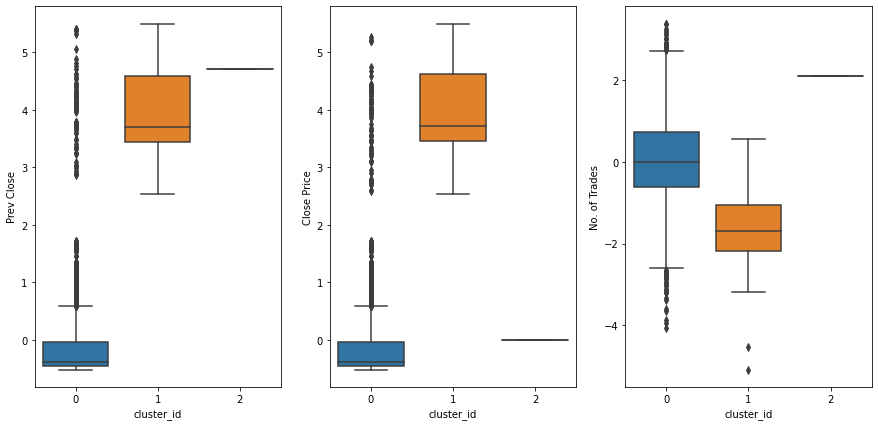

In [72]:
plt.figure(figsize=[15,7])
plt.subplot(1,3,1)
sns.boxplot(df_hie['cluster_id'],df_hie['Prev Close'])
plt.subplot(1,3,2)
sns.boxplot(df_hie['cluster_id'],df_hie['Close Price'])
plt.subplot(1,3,3)
sns.boxplot(df_hie['cluster_id'],df_hie['No. of Trades'])

plt.show()